In [300]:
#Import the libraries and load the data
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

#load the file
loan = pd.read_csv("loan.csv",encoding = "ISO-8859-1")
loan.isnull().sum()/loan.shape[0] *100
loan['loan_amnt'] = loan[loan['loan_amnt']!=0]
loan = loan.dropna(axis='columns',how='all')



C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [301]:
#checking the percentage of null values
loan.isnull().sum()/loan.shape[0]*100

id                             0.000000
member_id                      0.000000
loan_amnt                      0.000000
funded_amnt                    0.000000
funded_amnt_inv                0.000000
term                           0.000000
int_rate                       0.000000
installment                    0.000000
grade                          0.000000
sub_grade                      0.000000
emp_title                      6.191303
emp_length                     2.706650
home_ownership                 0.000000
annual_inc                     0.000000
verification_status            0.000000
issue_d                        0.000000
loan_status                    0.000000
pymnt_plan                     0.000000
url                            0.000000
desc                          32.580507
purpose                        0.000000
title                          0.027696
zip_code                       0.000000
addr_state                     0.000000
dti                            0.000000


In [302]:
loan = loan.drop(['next_pymnt_d','mths_since_last_delinq','mths_since_last_record','desc'], axis=1)

In [303]:
loan.isnull().sum()/loan.shape[0]*100

id                            0.000000
member_id                     0.000000
loan_amnt                     0.000000
funded_amnt                   0.000000
funded_amnt_inv               0.000000
term                          0.000000
int_rate                      0.000000
installment                   0.000000
grade                         0.000000
sub_grade                     0.000000
emp_title                     6.191303
emp_length                    2.706650
home_ownership                0.000000
annual_inc                    0.000000
verification_status           0.000000
issue_d                       0.000000
loan_status                   0.000000
pymnt_plan                    0.000000
url                           0.000000
purpose                       0.000000
title                         0.027696
zip_code                      0.000000
addr_state                    0.000000
dti                           0.000000
delinq_2yrs                   0.000000
earliest_cr_line         

In [304]:
#Just to check the percentages of pub recorded bankruptcies
loan.groupby('pub_rec_bankruptcies').count()/loan.shape[0] * 100

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,tax_liens
pub_rec_bankruptcies,,,,,,,,,,,,,,,,,,,,,
0.0,94.012639,94.012639,94.012639,94.012639,94.012639,94.012639,94.012639,94.012639,94.012639,94.012639,...,93.848982,94.012639,94.010122,94.012639,94.012639,94.012639,94.012639,94.012639,94.012639,94.012639
1.0,4.214820,4.214820,4.214820,4.214820,4.214820,4.214820,4.214820,4.214820,4.214820,4.214820,...,4.199713,4.214820,4.214820,4.209784,4.214820,4.214820,4.214820,4.209784,4.214820,4.214820
2.0,0.017625,0.017625,0.017625,0.017625,0.017625,0.017625,0.017625,0.017625,0.017625,0.017625,...,0.017625,0.017625,0.017625,0.017625,0.017625,0.017625,0.017625,0.017625,0.017625,0.017625


In [305]:
#replacing null values in public_rec_bankruptcies with 0

loan['pub_rec_bankruptcies']=loan['pub_rec_bankruptcies'].fillna(0)
loan['pub_rec_bankruptcies'].unique()
 


array([0., 1., 2.])

In [306]:
# #remove the % sign from the revol_util column
loan['revol_util'] = loan['revol_util'].str.split("%",expand = True)[0]
#replace the null values

stats = loan['revol_util'].astype(float).agg(["mean","median","std","min","max"],axis=0)

revol_mean = loan['revol_util'].astype(float).mean()
loan['revol_util'] = loan['revol_util'].fillna(revol_mean)


In [307]:
loan['revol_util'] = loan['revol_util'].astype(float)

In [308]:
#check the null values
loan['revol_util'].isnull().sum()

loan['revol_util'].dtype

loan['revol_util']=loan['revol_util'].astype('str')

# loan['revol_util'].dtype


In [309]:
#remove the space and other special characters from emp_length

loan['emp_length'] = loan['emp_length'].str.replace('[^0-9]+', '')

loan['emp_length'] = loan['emp_length'].astype(float)

In [310]:
loan[loan['emp_length'].astype(float)<loan['emp_length'].astype(float).quantile(0.80)].count()

loan['emp_length'].describe()

count    38642.000000
mean         5.092050
std          3.408338
min          1.000000
25%          2.000000
50%          4.000000
75%          9.000000
max         10.000000
Name: emp_length, dtype: float64

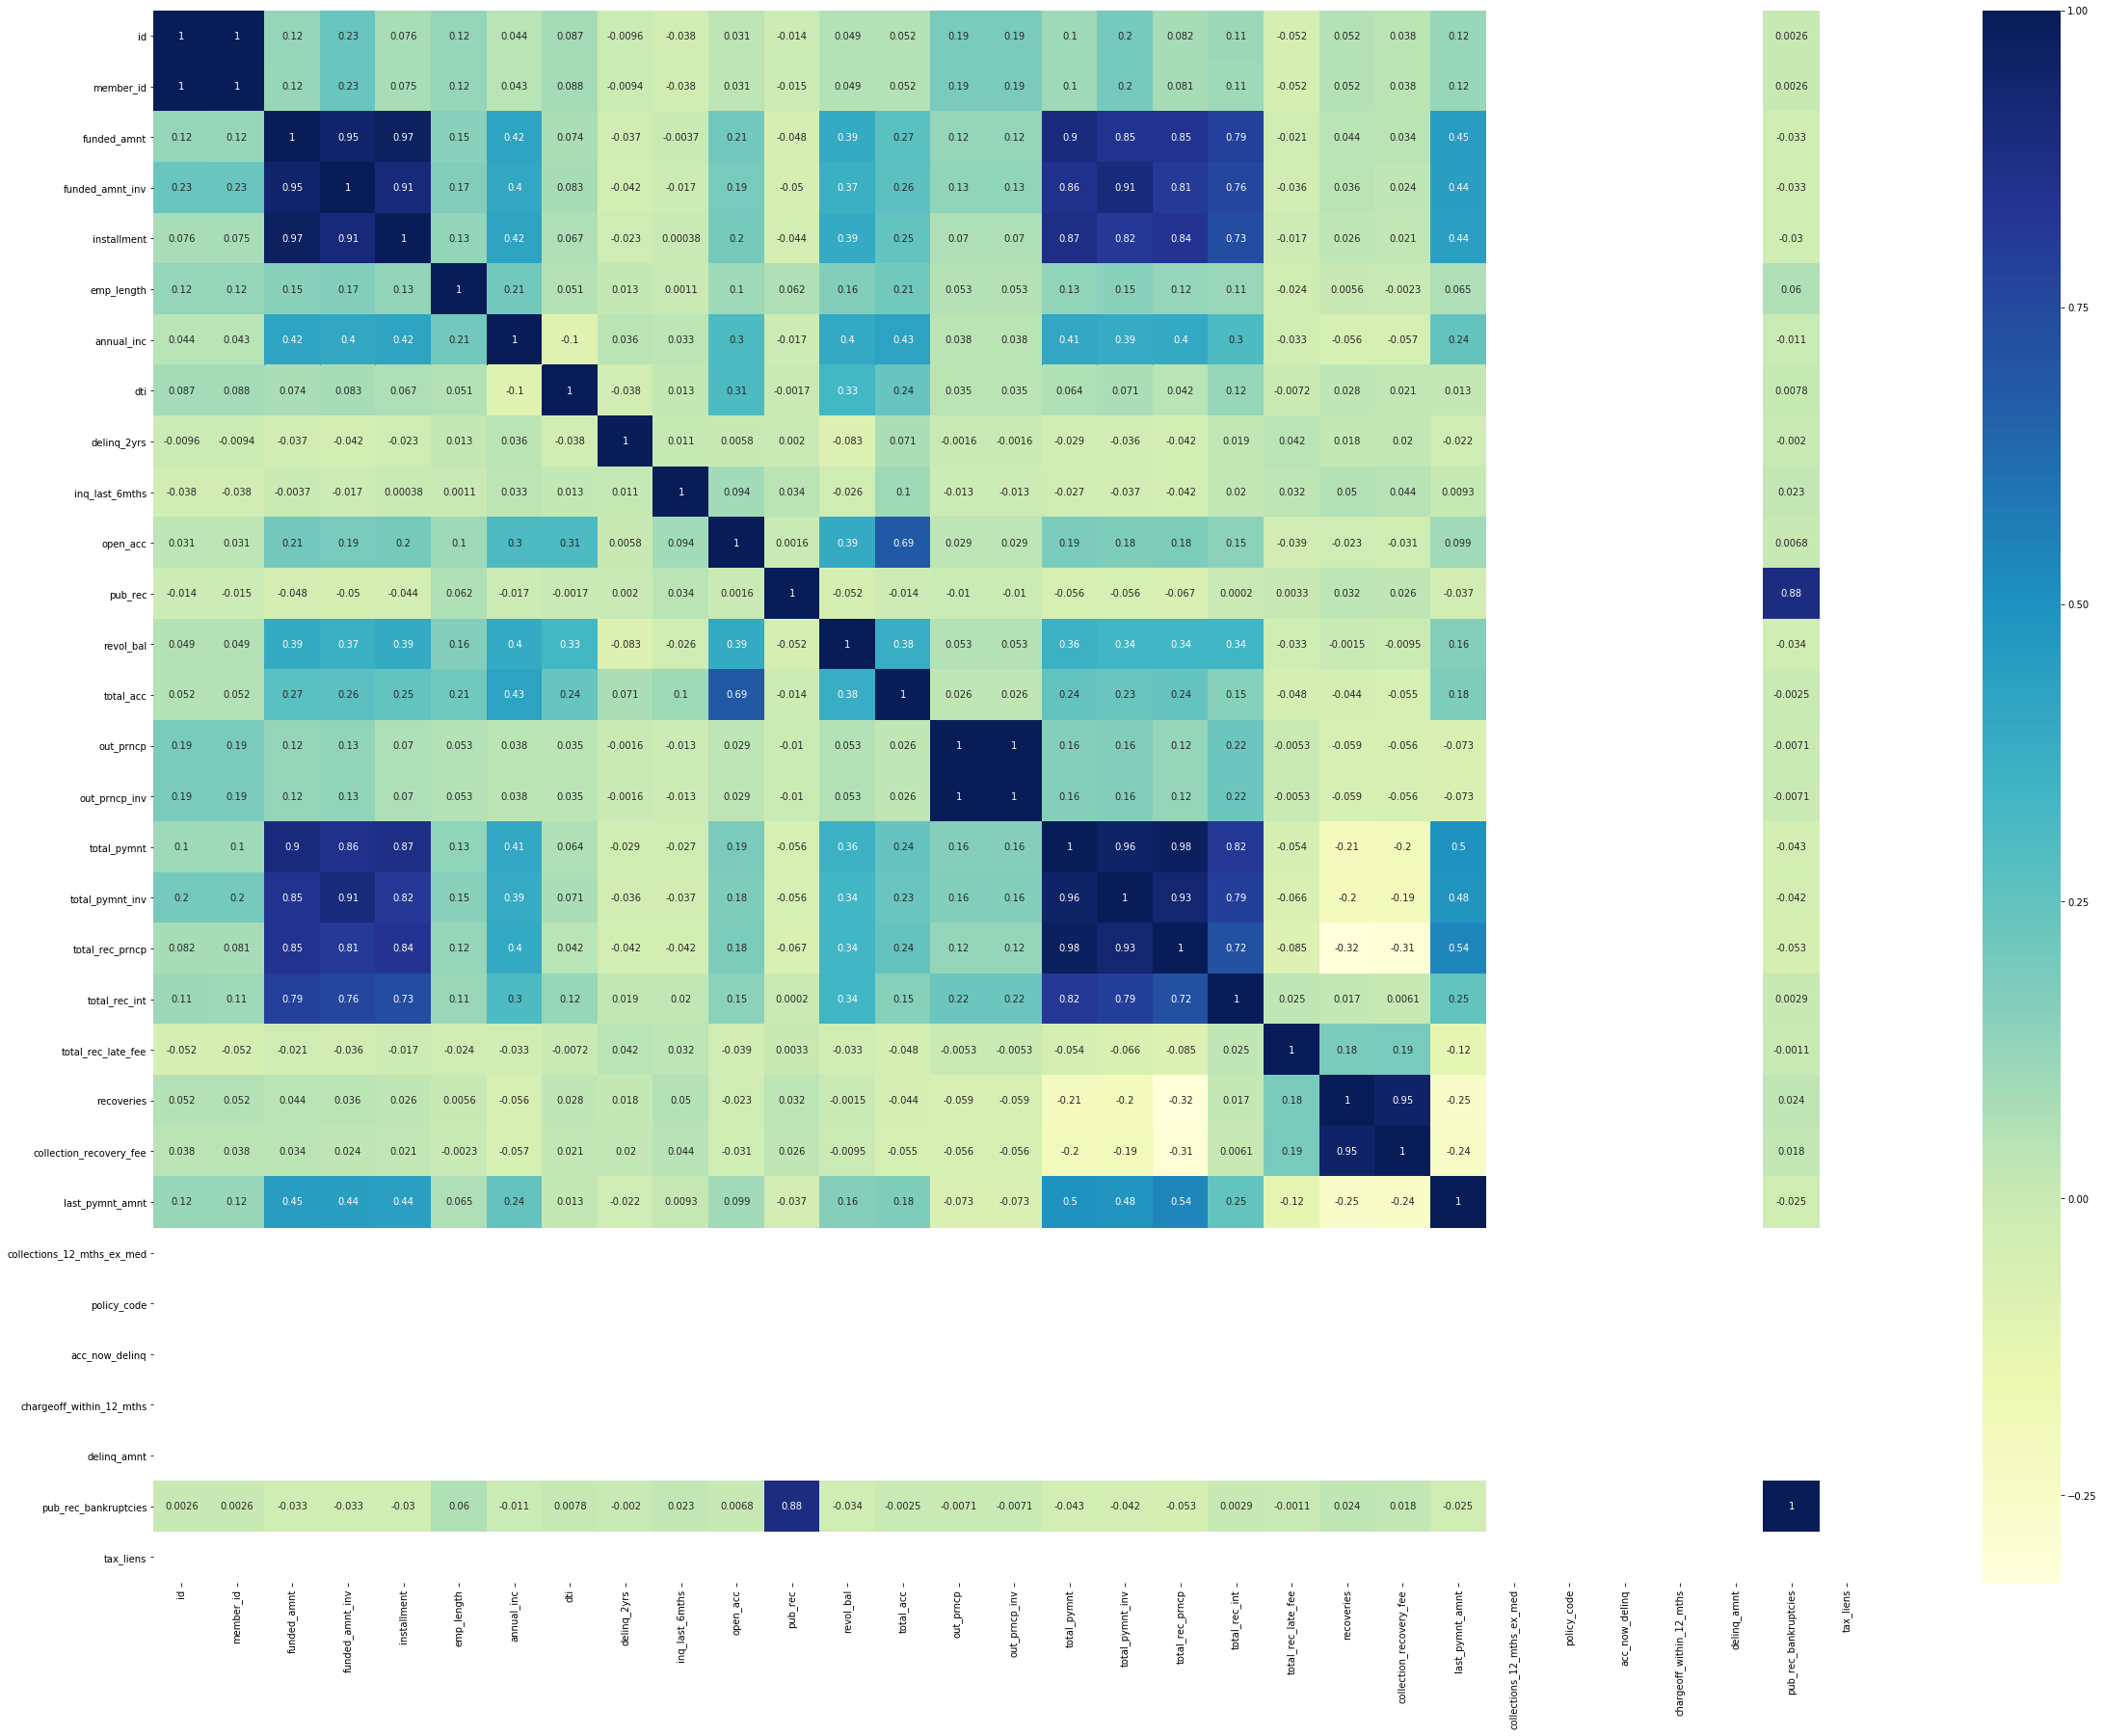

In [311]:
plt.figure(figsize=(40,30))
cor = loan.corr(method = 'spearman')
sns.heatmap(cor, annot=True,cmap="YlGnBu")
# plt.show()
plt.savefig('corr.jpg')

In [312]:
#getting the correlation matrix into the csv format
c = loan.corr().abs()
s = c.unstack()

s.sort_values(ascending = False).to_csv("cor_matrix.csv")

In [334]:
#getting data for univariate table.

#funded_amount_inv
display(loan['funded_amnt_inv'].describe().reset_index())

#Interest rate
display(loan['int_rate'].describe().reset_index())

#calculating maximum number of loans under the home ownership dtype
display(loan.groupby('home_ownership')[['funded_amnt']].count().reset_index().sort_values(by = 'funded_amnt',ascending = False))

#calculating maximum number of verification status
display(loan.groupby('verification_status')[['funded_amnt']].count().reset_index().sort_values(by = 'funded_amnt',ascending = False))

#calculating the maximum number of loans by loan_status
display(loan.groupby('loan_status')[['funded_amnt']].count().reset_index().sort_values(by = 'funded_amnt',ascending = False))

#calculating maximum number of loans by purpose
display(loan.groupby('purpose')[['funded_amnt']].count().reset_index().sort_values(by = 'funded_amnt',ascending = False))

#calculating maximum number of loans by purpose
display(loan.groupby('emp_length')[['funded_amnt']].count().reset_index().sort_values(by = 'funded_amnt',ascending = False))

,index,funded_amnt_inv
0,count,39717.000000
1,mean,10397.448868
2,std,7128.450439
3,min,0.000000
4,25%,5000.000000
5,50%,8975.000000
6,75%,14400.000000
7,max,35000.000000


,index,int_rate
0,count,39717.000000
1,mean,12.021177
2,std,3.724825
3,min,5.420000
4,25%,9.250000
5,50%,11.860000
6,75%,14.590000
7,max,24.590000


,home_ownership,funded_amnt
4,RENT,18899
0,MORTGAGE,17659
3,OWN,3058
2,OTHER,98
1,NONE,3


,verification_status,funded_amnt
0,Not Verified,16921
2,Verified,12809
1,Source Verified,9987


,loan_status,funded_amnt
2,Fully Paid,32950
0,Charged Off,5627
1,Current,1140


,purpose,funded_amnt
2,debt_consolidation,18641
1,credit_card,5130
9,other,3993
4,home_improvement,2976
6,major_purchase,2187
11,small_business,1828
0,car,1549
13,wedding,947
7,medical,693
8,moving,583


,emp_length,funded_amnt
9,10.0,8879
0,1.0,7823
1,2.0,4388
2,3.0,4095
3,4.0,3436
4,5.0,3282
5,6.0,2229
6,7.0,1773
7,8.0,1479
8,9.0,1258


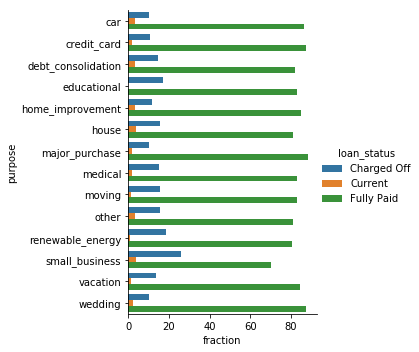

In [313]:
#check loan_status percent based on purpose

purpose = loan.groupby(["purpose","loan_status"]).count().reset_index()

purpose2 = loan.groupby('purpose').count().reset_index()

purpose2['id2'] = purpose2['id']

purpose3 = purpose[['id','loan_status','purpose']]
purpose4 = purpose2[['id2','purpose']]
merged = pd.merge(purpose3,purpose4,on='purpose',how = 'inner')


merged['fraction'] = merged['id']/merged['id2'] * 100
merged_2 = merged.groupby(['purpose','loan_status'])[['fraction']].sum().reset_index()

#plot
g = sns.catplot(y="purpose", x="fraction", hue="loan_status", kind="bar", data=merged);

#we see a spike for small business based on count

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


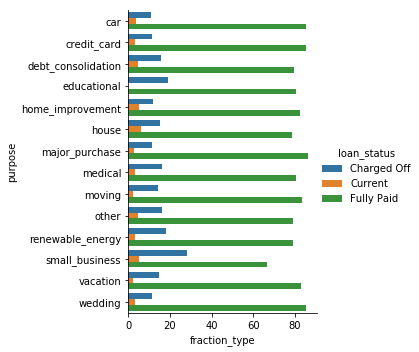

In [314]:
#same analysis based on amount
purpose_amnt = loan.groupby(["purpose","loan_status"]).sum().reset_index()
purpose2_amnt = loan.groupby('purpose').sum().reset_index()
purpose3_amnt = purpose_amnt[['purpose','loan_status','funded_amnt']]
purpose4_amnt = purpose2_amnt[['purpose','funded_amnt']]
sum = purpose4_amnt['funded_amnt'].sum()
purpose4_amnt['main_fraction'] = purpose2_amnt['funded_amnt']/sum * 100
merged_amnt = pd.merge(purpose3_amnt,purpose4_amnt,on='purpose',how = 'inner')
merged_amnt['fraction_type'] = merged_amnt['funded_amnt_x']/merged_amnt['funded_amnt_y']*100
merged_amnt.to_csv("purpose_amount.csv")
merged_amnt
#do the plot
h = sns.catplot(x="fraction_type", y="purpose", hue="loan_status", kind="bar", data=merged_amnt);
#We see the same spike

In [315]:
#getting the average interest rates for home_ownership types
loan['int_rate'] = loan['int_rate'].astype(str).str.split('%',expand = True)[0]
loan['int_rate'] = loan['int_rate'].astype(float)

# home_charged.groupby(["home_ownership",""]).count()

home_mean = loan.groupby('home_ownership').mean().reset_index()

# home_mean['int_rate']

home_mean[['home_ownership','int_rate']]

# list(home_mean.columns.values)

,home_ownership,int_rate
0,MORTGAGE,11.771737
1,NONE,8.696667
2,OTHER,12.040918
3,OWN,11.772642
4,RENT,12.294890


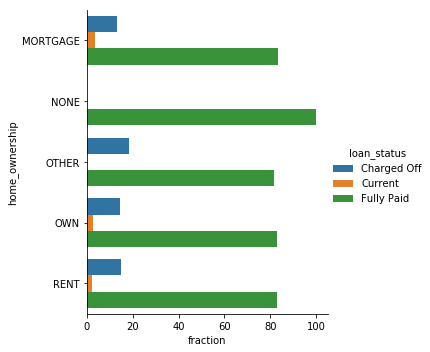

In [316]:
#check plot based on the property type
home = loan.groupby(["home_ownership","loan_status"]).count().reset_index()
home2 = loan.groupby('home_ownership').count().reset_index()

home2['id2'] = home2['id']
home3 = home[['id','loan_status','home_ownership']]
home4 = home2[['id2','home_ownership']]
merged_home = pd.merge(home3,home4,on='home_ownership',how = 'inner')
merged_home['fraction'] = merged_home['id']/merged_home['id2'] * 100
merged_home_2 = merged_home.groupby(['home_ownership','loan_status'])[['fraction']].sum().reset_index()

#categorical plot. We see a spike for the other property type
h = sns.catplot(y="home_ownership", x="fraction", hue="loan_status", kind="bar", data=merged_home);

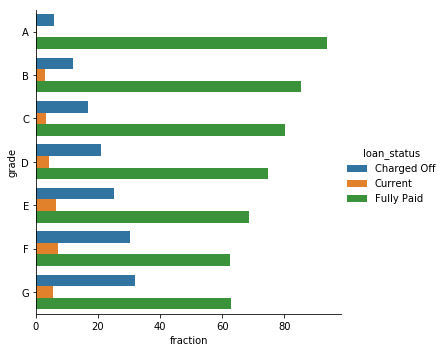

In [317]:
#Effect of loan status on the grade, we see a trend on increasing loan rates as grades are directly relate to the interst rates
graded = loan.groupby(["grade","loan_status"]).count().reset_index()
graded2 = loan.groupby('grade').count().reset_index()
graded2['id2'] = graded2['id']
graded3 = graded[['id','loan_status','grade']]
graded4 = graded2[['id2','grade']]
merged_grade = pd.merge(graded3,graded4,on='grade',how = 'inner')
merged_grade['fraction'] = merged_grade['id']/merged_grade['id2'] * 100
merged_grade_2 = merged_grade.groupby(['grade','loan_status'])[['fraction']].sum().reset_index()

#Do the categorical plot
g = sns.catplot(y="grade", x="fraction", hue="loan_status", kind="bar", data=merged_grade);

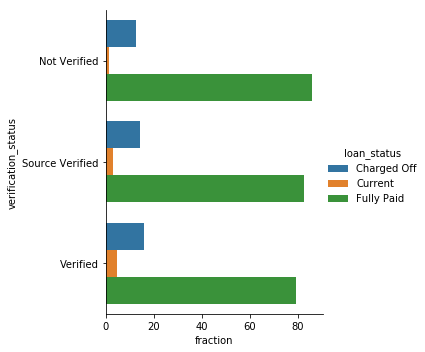

In [318]:
# We check the effect of verification
verification = loan.groupby(["verification_status","loan_status"]).count().reset_index()
verification2 = loan.groupby('verification_status').count().reset_index()
verification2['id2'] = verification2['id']
verification3 = verification[['id','loan_status','verification_status']]
verification4 = verification2[['id2','verification_status']]
merged_verification = pd.merge(verification3,verification4,on='verification_status',how = 'inner')
merged_verification['fraction'] = merged_verification['id']/merged_verification['id2'] * 100
merged_verification_2 = merged_verification.groupby(['verification_status','loan_status'])[['fraction']].sum().reset_index()

#do the categorical plot
g = sns.catplot(y="verification_status", x="fraction", hue="loan_status", kind="bar", data=merged_verification);

#We see an opposite trend for verfication

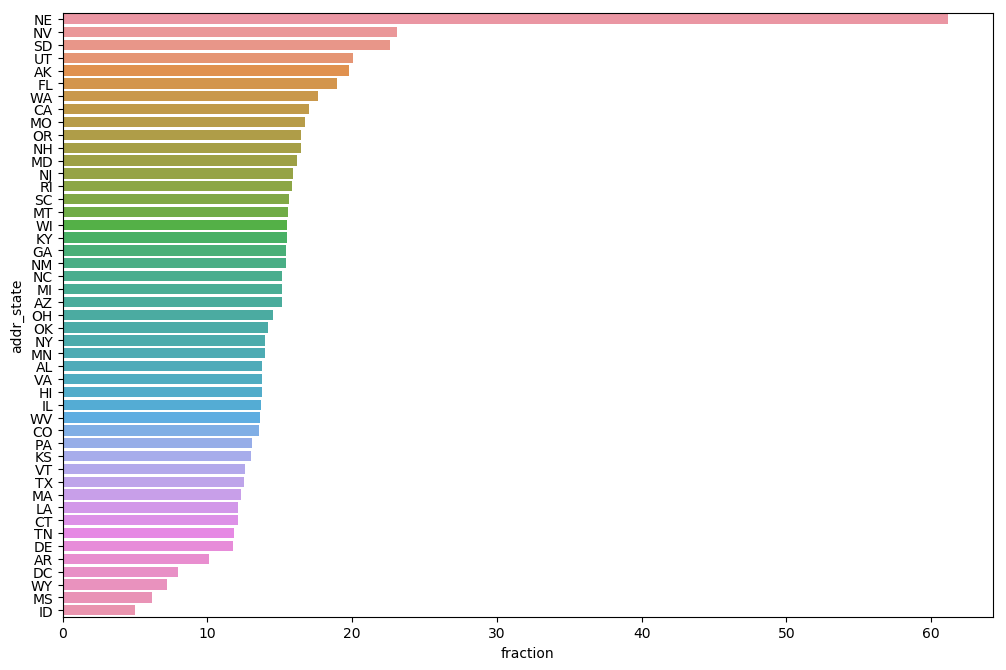

In [319]:
#sum analysis of ratio of loan by count of total ratio of amount defaulted
state_sum = loan.groupby(["addr_state","loan_status"])[['funded_amnt']].sum().reset_index()
state2_sum = loan.groupby('addr_state')[['funded_amnt']].sum().reset_index()
merged_state_sum = pd.merge(state_sum,state2_sum,on='addr_state',how = 'inner')
merged_state_sum['fraction'] = merged_state_sum['funded_amnt_x']/merged_state_sum['funded_amnt_y'] * 100
state_sum_plot = merged_state_sum[merged_state_sum['loan_status']=='Charged Off']

#bar plot of highest defaulters in a state. 
plt.figure(num=None, figsize=(12, 8), dpi=100, facecolor='w', edgecolor='k')
sns.barplot(x='fraction', y='addr_state', data=state_sum_plot.sort_values(by = 'fraction',ascending = False))
plt.show()

#NE, NV and SD are the top 3 of this list

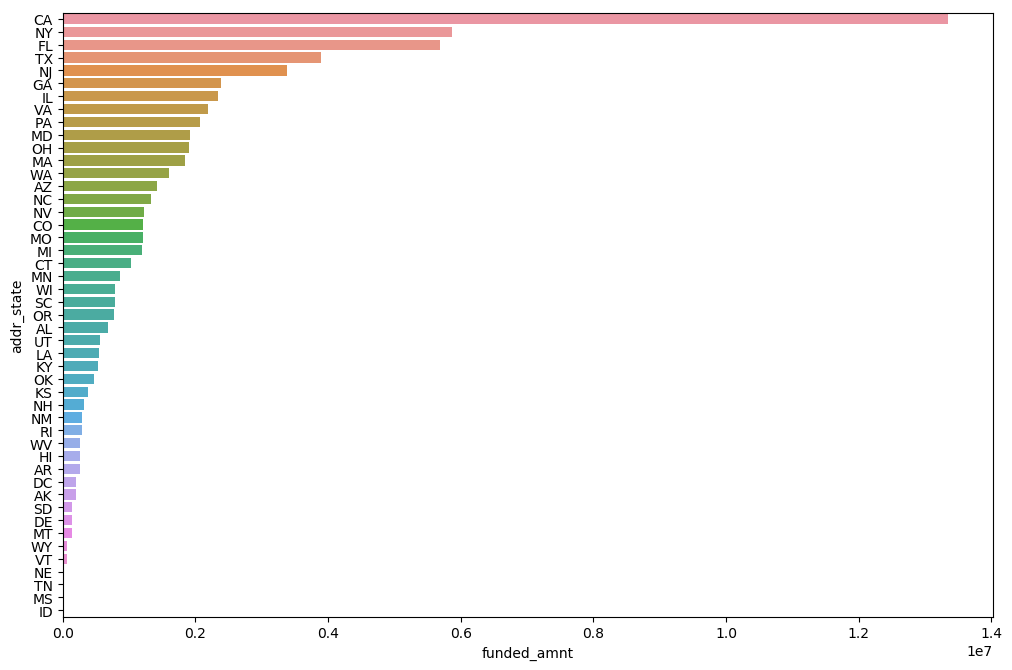

In [320]:
#maximum amount lost in which state

sum_2 = state_sum[state_sum['loan_status']=='Charged Off']

#plot for amount defaulted
plt.figure(num=None, figsize=(12, 8), dpi=100, facecolor='w', edgecolor='k')
sns.barplot(x='funded_amnt', y='addr_state', data=sum_2.sort_values(by = 'funded_amnt',ascending = False))
plt.show()

#WE see highest defaulted amount in California

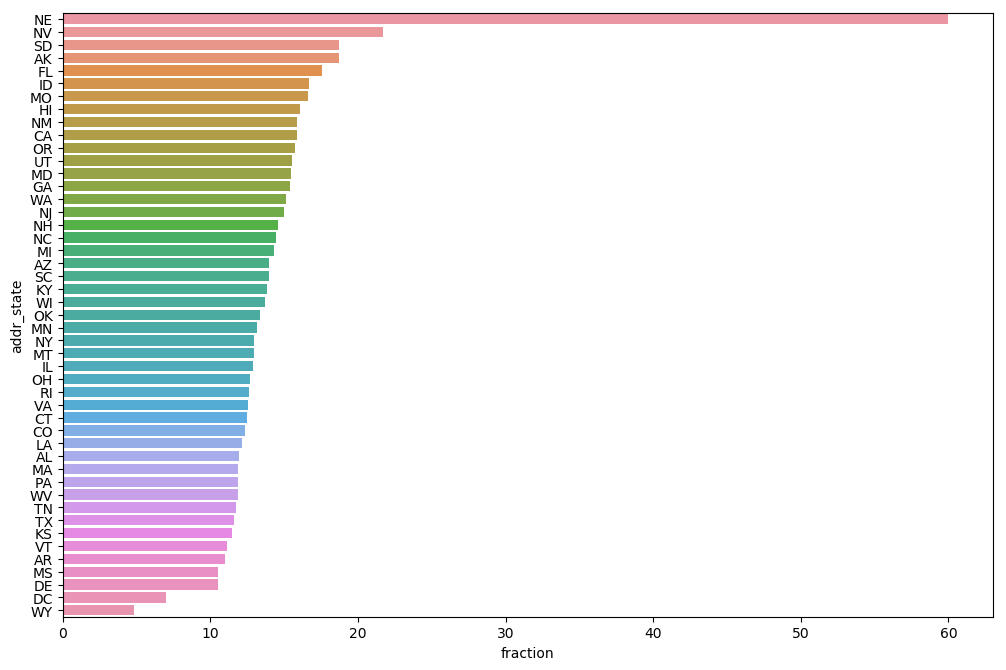

In [321]:
#count analysis of ratio of loan by count of number of defaulters
state = loan.groupby(["addr_state","loan_status"]).count().reset_index()
state2 = loan.groupby('addr_state').count().reset_index()
state2['id2'] = state2['id']
state3 = state[['id','loan_status','addr_state']]
state4 = state2[['id2','addr_state']]
merged_state = pd.merge(state3,state4,on='addr_state',how = 'inner')
merged_state['fraction'] = merged_state['id']/merged_state['id2'] * 100
merged_state_chg = merged_state[merged_state['loan_status']== 'Charged Off'].sort_values(['fraction'],ascending = False)
merged_state_2 = merged_state.groupby(['addr_state','loan_status'])[['fraction']].sum().reset_index()

#plot for state with the highest ratio of defectors.
plt.figure(num=None, figsize=(12, 8), dpi=100, facecolor='w', edgecolor='k')
sns.barplot(x='fraction', y='addr_state', data=merged_state_chg)
plt.show()
# We see the same trend for NE,NV and SD

In [322]:
#Correlation matrix of state


corr_state = loan.groupby(['addr_state','loan_status'])[['funded_amnt']].sum().reset_index()
corr_pv = corr_state.pivot(columns='loan_status', index='addr_state', values='funded_amnt').reset_index().sort_values(by = 'Charged Off',ascending = False)
corr_pv['sum'] = corr_pv['Charged Off']+corr_pv['Current']+corr_pv['Fully Paid']

corr_pv.corr()

#Although this doesn't tell us anything, I was trying to find out for the correlation between various factors and the charged off status for states.

loan_status,Charged Off,Current,Fully Paid,sum
loan_status,,,,
Charged Off,1.000000,0.940121,0.986748,0.990035
Current,0.940121,1.000000,0.964175,0.964541
Fully Paid,0.986748,0.964175,1.000000,0.999654
sum,0.990035,0.964541,0.999654,1.000000


In [323]:
#Since verification process has an anomaly, we'll drill down on verification

loan_charged = loan[loan['loan_status'] == 'Charged Off']


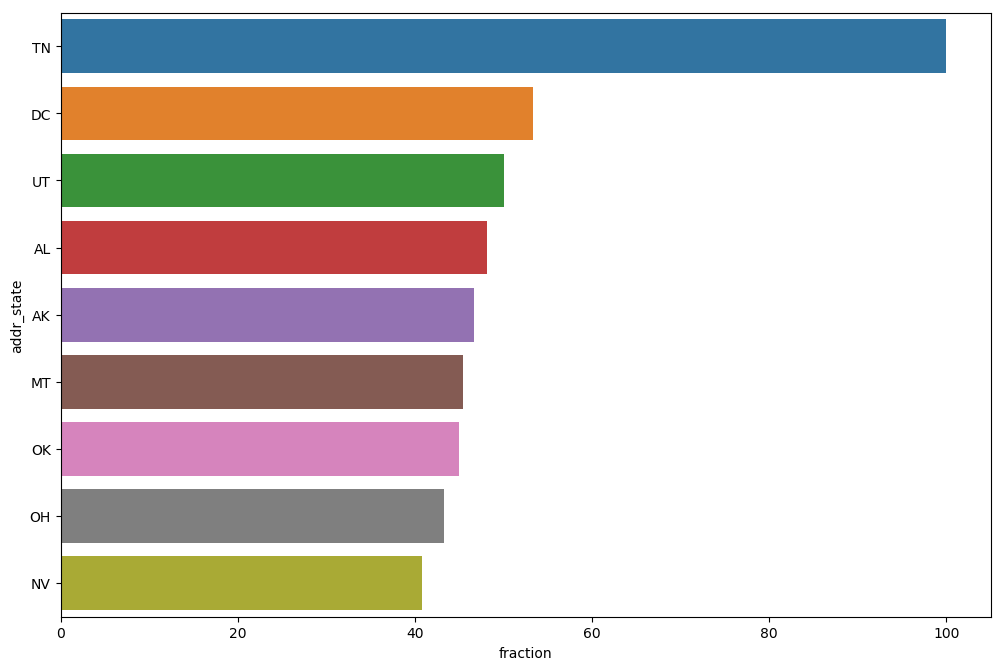

In [324]:
#Categorical Analysis for the loan charged as per the verification status

lc1 = loan_charged.groupby(["addr_state","verification_status"]).count().sort_values(by = 'id',ascending = False).reset_index()
lc2 = loan_charged.groupby('addr_state').count().sort_values(by = 'id',ascending = False).reset_index()
lc2['id2'] = lc2['id']
lc3 = lc1[['id','verification_status','addr_state']]
lc4 = lc2[['id2','addr_state']]
merged_lc = pd.merge(lc3,lc4,on='addr_state',how = 'inner')

merged_lc['fraction'] = merged_lc['id']/merged_lc['id2'] * 100

#We're checking maximum defectors groupying by states with a 'verified' verification status. THen filter out top 9 States
merged_lc_plot = merged_lc[merged_lc['verification_status']=='Verified'].sort_values(by = 'fraction',ascending = False).head(9)

plt.figure(num=None, figsize=(12, 8), dpi=100, facecolor='w', edgecolor='k')
sns.barplot(x='fraction', y='addr_state', data=merged_lc_plot)
plt.show()
# We need to look into the verfication authorities at TN

In [325]:
# plot_data = loan[['annual_inc','loan_status']]
# plot_data['annual_inc'] = plot_data['annual_inc'].astype(int)
# plot_data.boxplot()

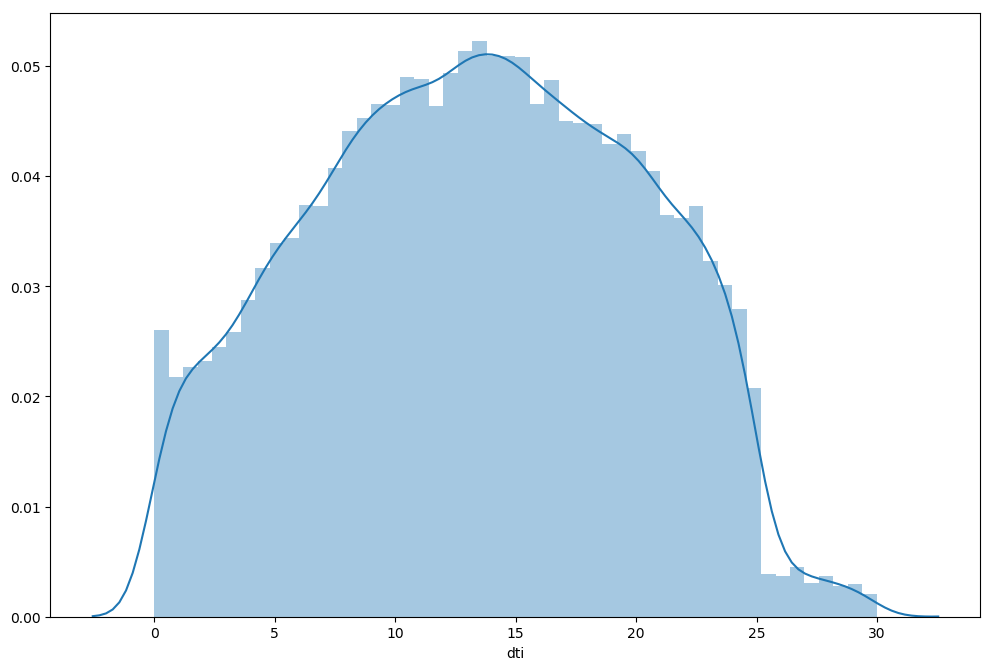

In [327]:
#dti rate distribution
plt.figure(num=None, figsize=(12, 8), dpi=100, facecolor='w', edgecolor='k')
sns.distplot(loan['dti'])
plt.show()

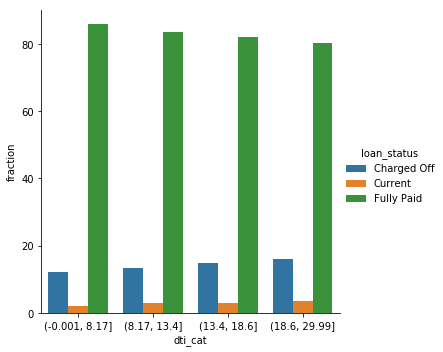

In [328]:
#cut based on mean, median and max
cut = pd.cut(loan['dti'],bins=[0.0,8.17,13.40,18.60,29.99],include_lowest=True)

loan['dti_cat'] = cut

dti = loan.groupby(["dti_cat","loan_status"]).count().reset_index()
dti2 = loan.groupby("dti_cat").count().reset_index()
dti4 = dti2[['dti_cat','id']]
dti3 = dti[['dti_cat','loan_status','id']]
dti_merge = pd.merge(dti3,dti4,on='dti_cat',how = 'inner')
dti_merge['fraction'] = dti_merge['id_x']/dti_merge['id_y']*100

#plot
g = sns.catplot(y="fraction", x="dti_cat", hue="loan_status", kind="bar", data=dti_merge);

#We see increasing trend accordinf to the dti rate, on default ratio

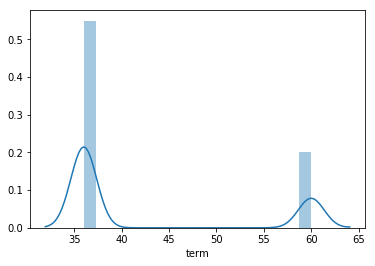

In [329]:
# loan['term'].replace(' months','',regex=True)
loan['term'] = loan['term'].replace(' months','',regex=True)
sns.distplot(loan['term'].astype(int))

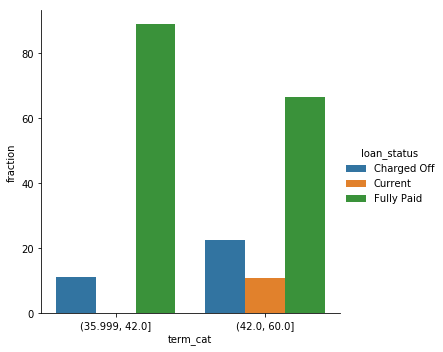

In [330]:
#getting categorical values based on term
loan['term'] = loan['term'].str.replace('[^0-9]+', '')
loan['term'] = loan['term'].astype('int')
cut = pd.cut(loan['term'],bins=[36,42,60],include_lowest=True)
loan['term_cat'] = cut
ln_term1 = loan.groupby(["term_cat","loan_status"])[['id']].count().reset_index()
ln_term2 = loan.groupby("term_cat")[['id']].count().reset_index()
term_merge = pd.merge(ln_term1,ln_term2,on='term_cat',how = 'inner')
term_merge['fraction'] = term_merge['id_x']/term_merge['id_y']*100
#we see an increasing trend based on term.
g = sns.catplot(y="fraction", x="term_cat", hue="loan_status", kind="bar", data=term_merge);

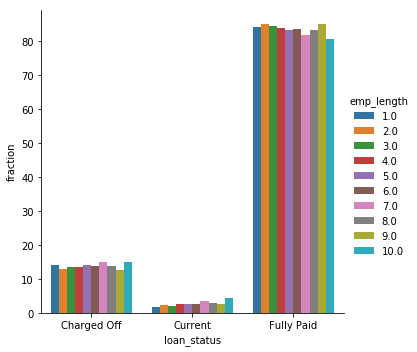

In [331]:
#employment length affect on loan_statuses

employement1 = loan.groupby(['emp_length','loan_status'])[['id']].count().reset_index()
employement2 = loan.groupby(['emp_length'])[['id']].count().reset_index()
merged_employee = pd.merge(employement1,employement2,on = 'emp_length',how= 'inner')


merged_employee['fraction'] = merged_employee['id_x']/merged_employee['id_y']*100

plt.figure(num=None, figsize=(12, 8), dpi=100, facecolor='w', edgecolor='k')
sns.catplot(x='loan_status', y='fraction', hue = 'emp_length',kind = 'bar',data=merged_employee)
plt.show()

# We see spikes on 1,7 and 10 years.